In [ ]:
import pandas as pd
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
heart_data= pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
heart_data


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
heart_data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
heart_data.shape

(253680, 22)

In [ ]:
heart_data['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

# Exploratory Data Analysis

In [ ]:
#checking where the NaN values are present in the entire data frame.
heart_data.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
heart_data['HeartDiseaseorAttack'].value_counts(normalize=True)*100

#9% people are heart patients

0.0    90.581441
1.0     9.418559
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
heart_data['BMI'].max()

98.0

In [ ]:
heart_data['BMI'].min()

12.0

In [ ]:
heart_data[heart_data['BMI']>50] #not possible

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
201,0.0,1.0,1.0,1.0,55.0,0.0,0.0,2.0,0.0,1.0,...,1.0,0.0,4.0,0.0,15.0,0.0,0.0,11.0,5.0,2.0
670,0.0,1.0,0.0,1.0,59.0,0.0,0.0,2.0,1.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0
758,0.0,1.0,1.0,1.0,52.0,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,3.0,0.0,2.0,1.0,1.0,10.0,5.0,6.0
835,0.0,0.0,0.0,1.0,55.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,5.0,5.0
952,0.0,1.0,1.0,1.0,54.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,30.0,0.0,1.0,0.0,7.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252714,0.0,1.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,4.0,5.0,1.0
252819,0.0,0.0,0.0,1.0,55.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,2.0,5.0,0.0,0.0,0.0,3.0,5.0,1.0
252844,0.0,1.0,0.0,1.0,51.0,0.0,0.0,2.0,0.0,0.0,...,1.0,1.0,4.0,0.0,7.0,1.0,0.0,7.0,4.0,5.0
253316,0.0,0.0,0.0,1.0,51.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,2.0,1.0


In [ ]:
heart_data[heart_data['BMI']<12] #impossible

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [ ]:
#delete all rows with 'BMI' value >50
indexbmi = heart_data[(heart_data['BMI'] > 50)].index
heart_data.drop(indexbmi , inplace=True)
heart_data.head(15)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [ ]:
heart_data[heart_data['BMI']>45] #all deleted

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
156,0.0,1.0,1.0,1.0,47.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,6.0,5.0
203,0.0,1.0,1.0,1.0,49.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,15.0,1.0,0.0,0.0,9.0,6.0,6.0
361,1.0,1.0,1.0,1.0,47.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,5.0,20.0,20.0,1.0,1.0,11.0,4.0,2.0
417,1.0,1.0,1.0,1.0,49.0,0.0,1.0,2.0,0.0,0.0,...,0.0,1.0,3.0,10.0,15.0,1.0,0.0,10.0,3.0,1.0
528,0.0,1.0,0.0,1.0,47.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,7.0,2.0,0.0,1.0,4.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253268,0.0,1.0,1.0,1.0,46.0,0.0,0.0,2.0,0.0,1.0,...,1.0,0.0,2.0,14.0,21.0,1.0,0.0,10.0,6.0,2.0
253370,0.0,1.0,0.0,1.0,46.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,6.0,1.0
253382,1.0,1.0,0.0,1.0,46.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,6.0,6.0,8.0
253402,0.0,1.0,1.0,1.0,49.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,7.0,1.0,0.0,7.0,6.0,5.0


In [ ]:
heart_data.shape

(251505, 22)

**CORRELATION MATRIX**

In [ ]:
heart_data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<Axes: >

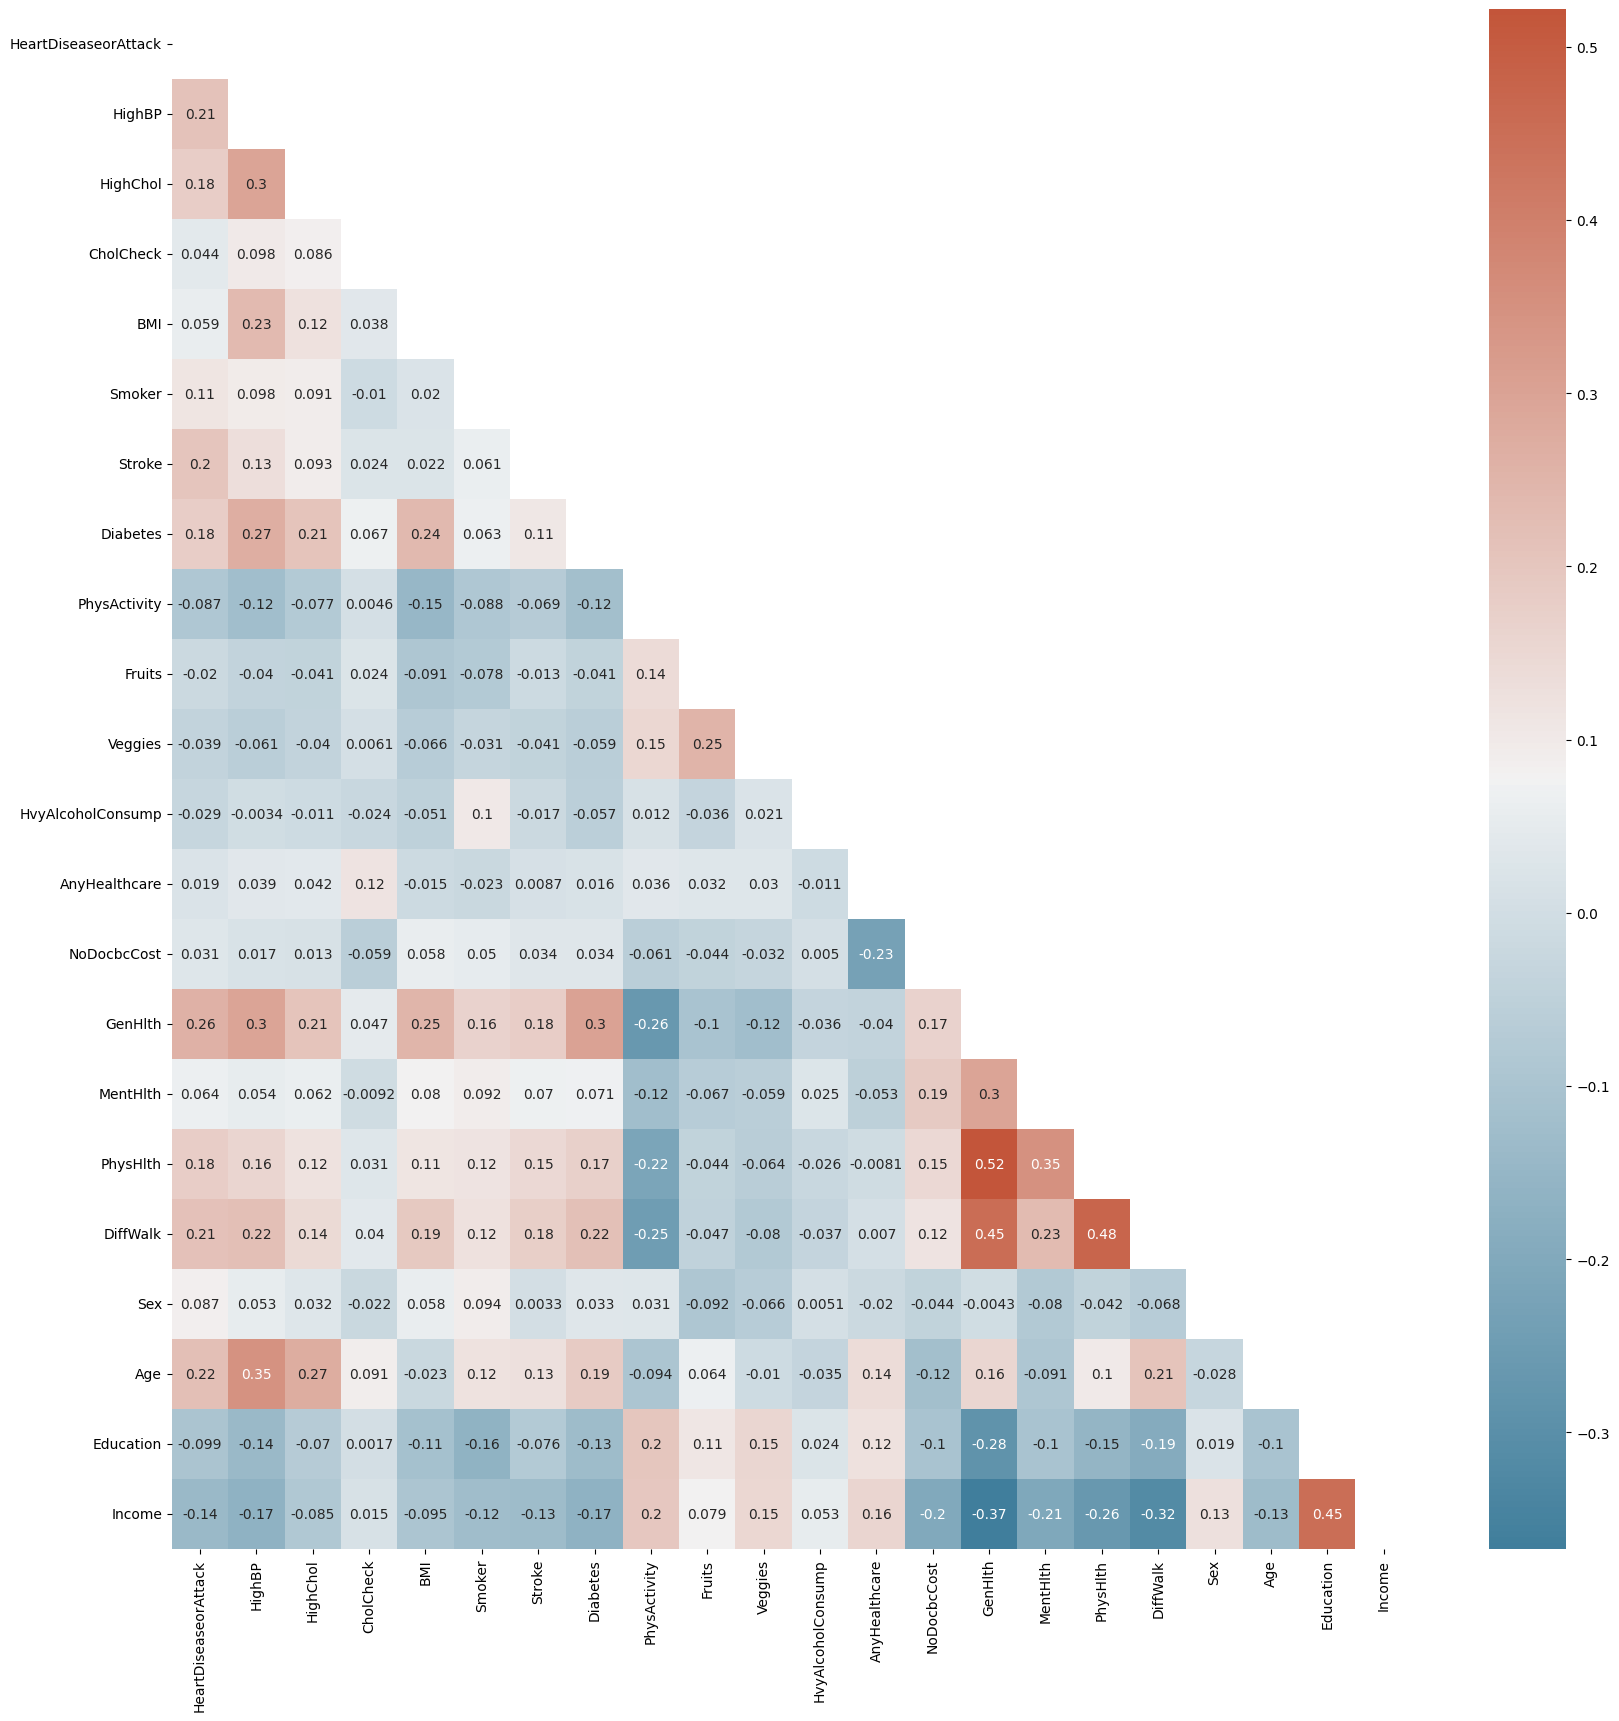

In [ ]:
corr = heart_data.corr()  # Correlation between different variables
f, ax = plt.subplots(figsize=(20,20)) # Set up the matplotlib plot configuration
mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for upper traingle
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Configure a custom diverging colormap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap) # Draw the heatmap

**Strong relations-**
1. education and income
2. diffwalk and physchealth
3. diffwalk and genhlth
4. physhlth and genhlth - (Strongest relation)
5. age and highbp
6. physhlth and mentalhlth
7. genhlth and heartdiseaseattack(o/p)

feature encoding - no need to do here as already done in dataset.

**MODELS TESTING**

In [ ]:
heart_data.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

**Split dataset in train-test (80:20 ratio)**

In [ ]:
from sklearn.model_selection import train_test_split
#pd.options.display.max_columns = None
heart_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
X = heart_data.drop(['HeartDiseaseorAttack'],axis=1)
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
X = heart_data.drop(['HeartDiseaseorAttack'],axis=1)
Y = heart_data['HeartDiseaseorAttack']
#Printing shapes of input and target
print('X Shape', X.shape)
print('Y Shape',Y.shape)

X Shape (251505, 21)
Y Shape (251505,)


In [ ]:
Y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 251505, dtype: float64

In [ ]:
heart_data['HeartDiseaseorAttack'].value_counts()

0.0    227863
1.0     23642
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
heart_data['HeartDiseaseorAttack'].value_counts(normalize=True)*100

0.0    90.599789
1.0     9.400211
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y) #train model

In [ ]:
x_train.shape, y_train.shape

((201204, 21), (201204,))

In [ ]:
x_test.shape, y_test.shape

((50301, 21), (50301,))

**1. Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1=LogisticRegression()

In [ ]:
model1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model1.score(x_test,y_test)

0.9058070416095108

In [ ]:
model1.score(x_train,y_train)

0.9066618953897537

**2.Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model2 = MultinomialNB()

In [ ]:
model2.fit(x_train, y_train)

MultinomialNB()

In [ ]:
model2.score(x_test,y_test)

0.8112959980914892

In [ ]:
model2.score(x_train,y_train)

0.8102970119878332

**3. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model3 = KNeighborsClassifier(n_neighbors=10)

In [ ]:
model3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
model3.score(x_test,y_test)

0.9042762569332617

In [ ]:
model3.score(x_train,y_train)

0.9095196914574263

**4. DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model4 = DecisionTreeClassifier(criterion='entropy')

In [ ]:
model4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
model4.score(x_test,y_test)

0.85336275620763

In [ ]:
model4.score(x_train,y_train)

0.9959891453450229

**5. Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model5 = RandomForestClassifier(n_estimators=100)

In [ ]:
model5.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model5.score(x_test,y_test)

0.9020695413610067

In [ ]:
model5.score(x_train,y_train)

0.9959593248643168

**6. XGB**

In [ ]:
import xgboost as xgb

In [ ]:
model6 = xgb.XGBClassifier()

In [ ]:
model6.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
model6.score(x_test,y_test)

0.9060257251346892

In [ ]:
model6.score(x_train,y_train)

0.9153744458360669

**7. Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model7= GradientBoostingClassifier()

In [ ]:
model7.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
model7.score(x_test,y_test)

0.9072980656448182

In [ ]:
model7.score(x_train,y_train)

0.9088437605614202

**8. Light GBM**

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [ ]:
model8 = LGBMClassifier()

In [ ]:
model8.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 18914, number of negative: 182290
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 201204, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094004 -> initscore=-2.265696
[LightGBM] [Info] Start training from score -2.265696


LGBMClassifier()

In [ ]:
model8.score(x_train,y_train)

0.9102701735551977

In [ ]:
model8.score(x_test,y_test)

0.9077950736565873

**EVALUATION OF ACCURACY AND PRECISION FOR ALL MODELS**

**Logistic regression**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
y_pred= model1.predict(x_test)

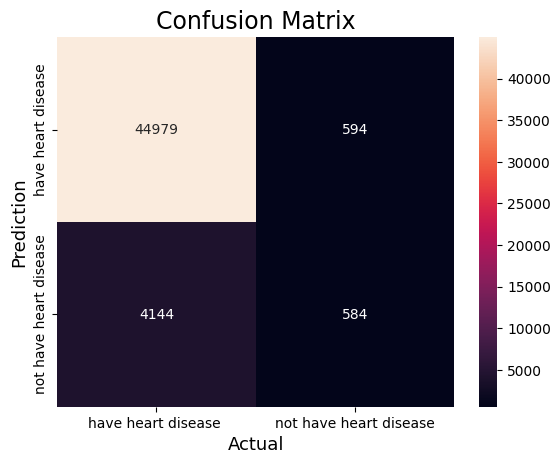

In [ ]:
actual    = y_test
predicted = y_pred
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['have heart disease ','not have heart disease'],
            yticklabels=['have heart disease','not have heart disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9058070416095108
Precision : 0.49575551782682514
Recall    : 0.12351945854483926
F1-score  : 0.19776498476125973


**Gaussian Naive Bayes**

In [ ]:
y_pred= model2.predict(x_test)

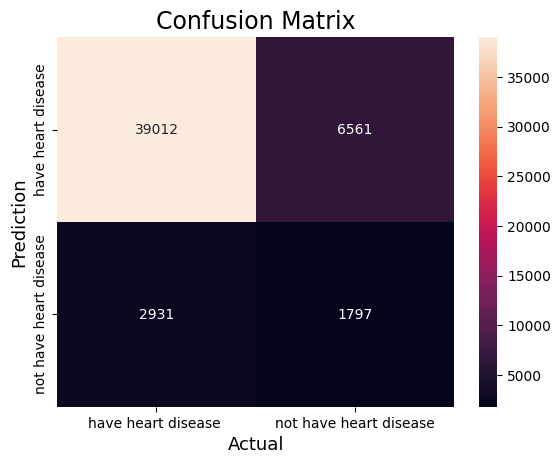

In [ ]:
actual    = y_test
predicted = y_pred
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['have heart disease ','not have heart disease'],
            yticklabels=['have heart disease','not have heart disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.8112959980914892
Precision : 0.21500358937544867
Recall    : 0.3800761421319797
F1-score  : 0.27464465841357183


**KNN**

In [ ]:
y_pred= model3.predict(x_test)

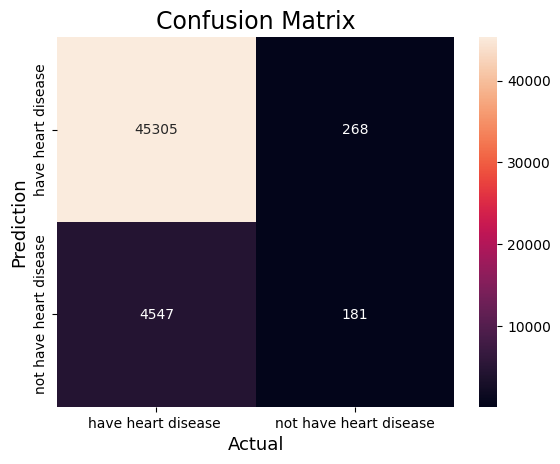

In [ ]:
actual    = y_test
predicted = y_pred
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['have heart disease ','not have heart disease'],
            yticklabels=['have heart disease','not have heart disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9042762569332617
Precision : 0.40311804008908686
Recall    : 0.038282571912013535
F1-score  : 0.06992466679544138


**DECISION TREE**

In [ ]:
y_pred= model4.predict(x_test)

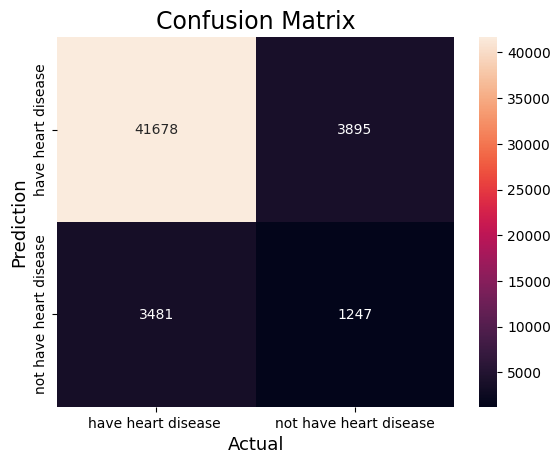

In [ ]:
actual    = y_test
predicted = y_pred
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['have heart disease ','not have heart disease'],
            yticklabels=['have heart disease','not have heart disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.85336275620763
Precision : 0.2425126409957215
Recall    : 0.26374788494077833
F1-score  : 0.2526849037487335


**Random forest**

In [ ]:
y_pred= model5.predict(x_test)

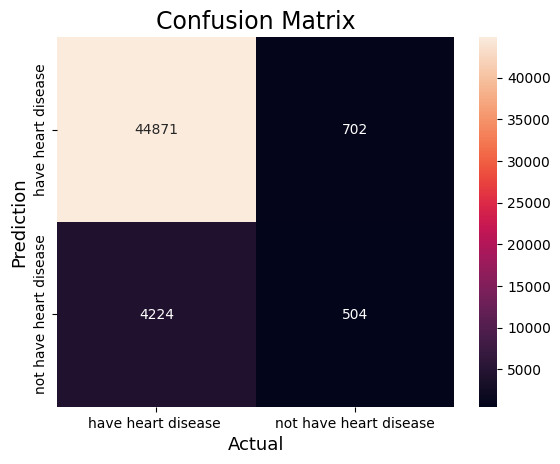

In [ ]:
actual    = y_test
predicted = y_pred
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['have heart disease ','not have heart disease'],
            yticklabels=['have heart disease','not have heart disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9020695413610067
Precision : 0.417910447761194
Recall    : 0.1065989847715736
F1-score  : 0.1698685540950455


**XGB**

In [ ]:
y_pred= model6.predict(x_test)

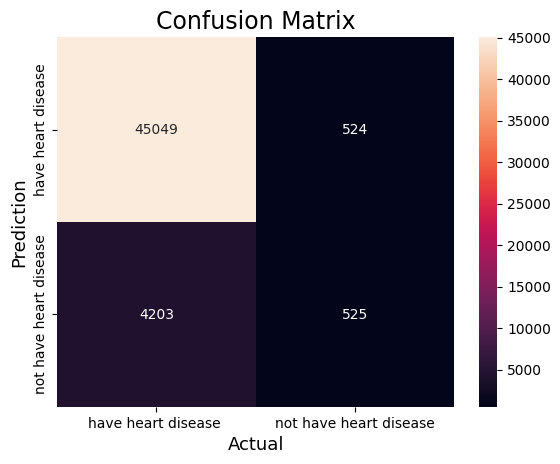

In [ ]:
actual    = y_test
predicted = y_pred
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['have heart disease ','not have heart disease'],
            yticklabels=['have heart disease','not have heart disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9060257251346892
Precision : 0.5004766444232602
Recall    : 0.11104060913705584
F1-score  : 0.18175523628180718


**Gradient boosting**

In [ ]:
y_pred= model7.predict(x_test)

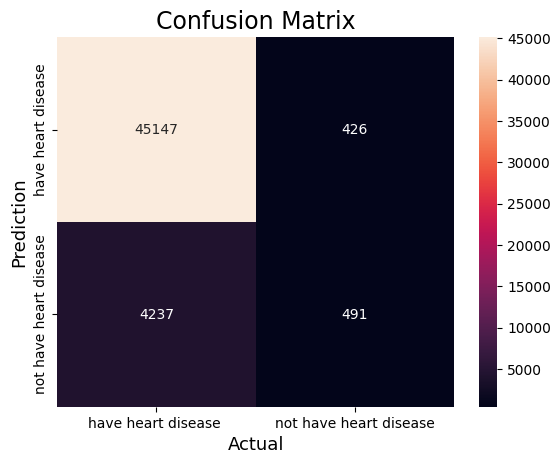

In [ ]:
actual    = y_test
predicted = y_pred
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['have heart disease ','not have heart disease'],
            yticklabels=['have heart disease','not have heart disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9072980656448182
Precision : 0.5354416575790621
Recall    : 0.10384940778341793
F1-score  : 0.17395925597874226


**LIGHT GBM**

In [ ]:
y_pred= model8.predict(x_test)

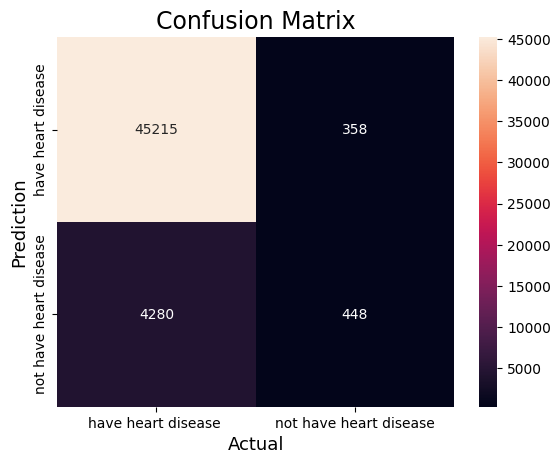

In [ ]:
actual    = y_test
predicted = y_pred
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['have heart disease ','not have heart disease'],
            yticklabels=['have heart disease','not have heart disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9077950736565873
Precision : 0.5558312655086849
Recall    : 0.09475465313028765
F1-score  : 0.16190820383086377


In [ ]:
#X = heart_data.drop(['HeartDiseaseorAttack'],axis=1)
#Y = heart_data['HeartDiseaseorAttack']
from keras.utils import normalize
X = normalize(X, axis=1)

In [ ]:
#importances = list(model8.feature_importances_)
#on light gbm
features_list = list(X.columns)
feature_imp = pd.Series(model8.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)


Age                  412
BMI                  405
GenHlth              271
Income               229
PhysHlth             205
MentHlth             200
Sex                  168
Stroke               149
Education            137
HighChol             123
Diabetes             116
Smoker               101
HighBP                93
NoDocbcCost           72
DiffWalk              72
PhysActivity          48
Fruits                47
Veggies               45
CholCheck             42
HvyAlcoholConsump     33
AnyHealthcare         32
dtype: int32


ROC_AUC score for imbalanced data is:
0.5434495623187698


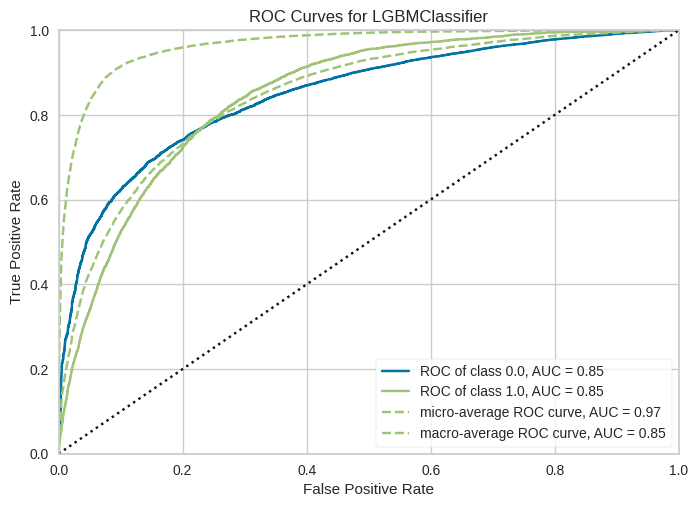

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn
pred_test8 = model8.predict(x_test)
print("ROC_AUC score for imbalanced data is:")
print(roc_auc_score(y_test,pred_test8))

from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model8)  #Create object
roc_auc.fit(x_train, y_train)
roc_auc.score(x_test, y_test)
roc_auc.show()

<ipython-input-95-e7da1d3c69b0>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-95-e7da1d3c69b0>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-95-e7da1d3c69b0>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-95-e7da1d3c69b0>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-95-e7

[LightGBM] [Info] Number of positive: 18914, number of negative: 182290
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 201204, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094004 -> initscore=-2.265696
[LightGBM] [Info] Start training from score -2.265696


<ipython-input-95-e7da1d3c69b0>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


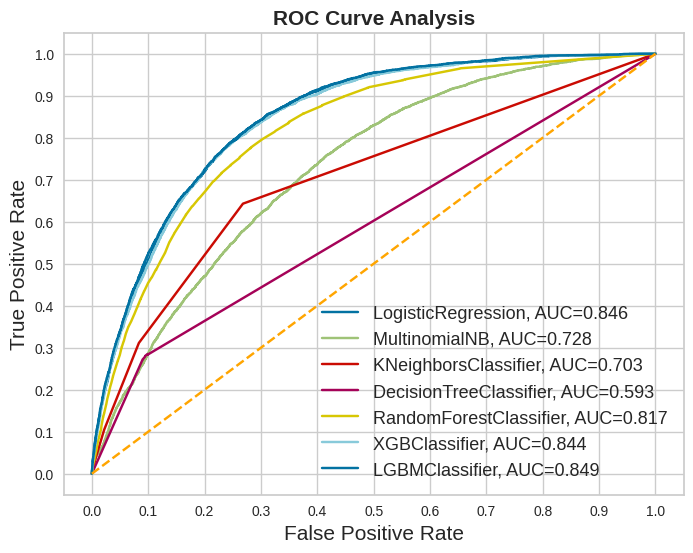

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
classifiers = [LogisticRegression(max_iter=900),
         MultinomialNB(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         RandomForestClassifier(),
         xgb.XGBClassifier(),
         LGBMClassifier(),
         ]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    yproba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**BALANCING OF DATA**

**BALANCING TECHNIQUE 1 - SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#we can clearly see there is a class imbalance problem as there are 4860 cases of heart but only 249 cases of no-stroke.
#We’ll use SMOTE to handle this class imbalance.
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=40)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0. 1.] [227863  23642]
After SMOTE:  [0. 1.] [227863 227863]


**Logistic Regression**

Accuracy: 0.7721567594847827

Count of predicted label: [0. 1.] [42364 48782]

Confusion Metrics: 
 [[33634 12037]
 [ 8730 36745]]

Precision Values for: 
  Healthy Patients with no disease = 0.7939288074780474
  Patients With Liver disease = 0.7532491492763724

Recall Values for: 
  Healthy Patients with no disease =  0.7364410676359178
  Healthy Patients With Liver disease =  0.8080263881253436

F-Measure Values for: 
  Healthy Patients with no disease =  0.76410518543761
  Patients with liver disease =  0.7796768409773279

ROC AUC score for Logestic Regression model after SMOTE:  0.7722337278806307



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


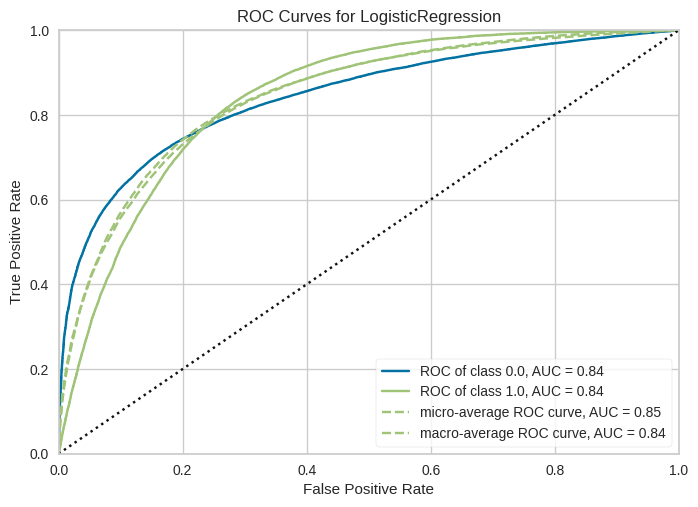

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model1 = LogisticRegression(max_iter=900)
model1.fit(X_train_smote, y_train_smote)
LR_prediction_smote = model1.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, LR_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logestic Regression model after SMOTE: ",roc_auc_score(y_test_smote, LR_prediction_smote))
print()

roc_auc=ROCAUC(model1)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

**Gaussian Naive Bayes**

Accuracy =  0.6365940359423343

Count of predicted labels:  [0. 1.] [60128 31018]

Confusion Metrics after SMOTE: 
 [[36338  9333]
 [23790 21685]]

Precision Values for: 
  Healthy Patients with no disease = 0.6043440659925492
  Patients With Liver disease = 0.6991101940808563

Recall Values for: 
  Healthy Patients with no disease =  0.7956471283746798
  Healthy Patients With Liver disease =  0.47685541506322154

F-Measure Values for: 
  Healthy Patients with no disease =  0.6869252072325825
  Patients with liver disease =  0.5669799850966756

ROC AUC score for Gaussian Naive Bayes model after SMOTE:  0.6362512717189507



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


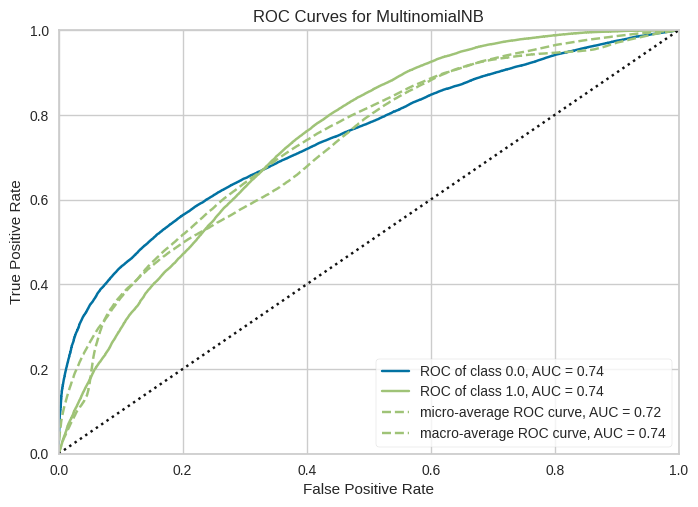

<Axes: title={'center': 'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model2 = MultinomialNB()
model2.fit(X_train_smote, y_train_smote)

NB_prediction_smote = model2.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, NB_prediction_smote))
print()

(unique, counts) = np.unique(NB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, NB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after SMOTE: ",roc_auc_score(y_test_smote, NB_prediction_smote))
print()

roc_auc=ROCAUC(model2)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

**KNN**

Accuracy =  0.8642946481469291

Count of predicted labels:  [0. 1.] [34010 57136]

Confusion Metrics after SMOTE: 
 [[33656 12015]
 [  354 45121]]

Precision Values for: 
  Healthy Patients with no disease = 0.9895912966774478
  Patients With Liver disease = 0.7897122654718566

Recall Values for: 
  Healthy Patients with no disease =  0.7369227737513958
  Healthy Patients With Liver disease =  0.9922155030236394

F-Measure Values for: 
  Healthy Patients with no disease =  0.8447685144513749
  Patients with liver disease =  0.8794573681184278

ROC AUC score for KNN model after SMOTE:  0.8645691383875177



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


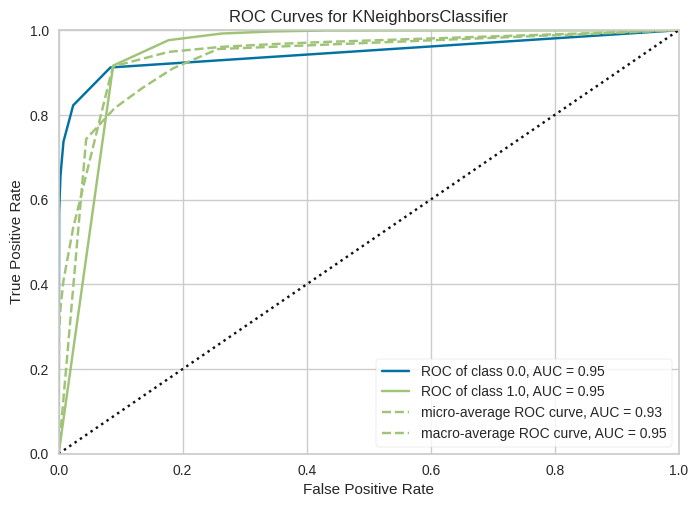

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model3 = KNeighborsClassifier()
model3.fit(X_train_smote, y_train_smote)

KNN_prediction_smote = model3.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, KNN_prediction_smote))
print()

(unique, counts) = np.unique(KNN_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, KNN_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after SMOTE: ",roc_auc_score(y_test_smote, KNN_prediction_smote))
print()

roc_auc=ROCAUC(model3)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

**DECISION TREE**

Accuracy =  0.8979000724112962

Count of predicted labels:  [0. 1.] [45083 46063]

Confusion Metrics after SMOTE: 
 [[40724  4947]
 [ 4359 41116]]

Precision Values for: 
  Healthy Patients with no disease = 0.9033116695872058
  Patients With Liver disease = 0.8926036081019474

Recall Values for: 
  Healthy Patients with no disease =  0.8916818112149942
  Healthy Patients With Liver disease =  0.9041451346893897

F-Measure Values for: 
  Healthy Patients with no disease =  0.8974590651651717
  Patients with liver disease =  0.8983373025410213

ROC AUC score for Decision Tree model after SMOTE:  0.8979134729521919



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


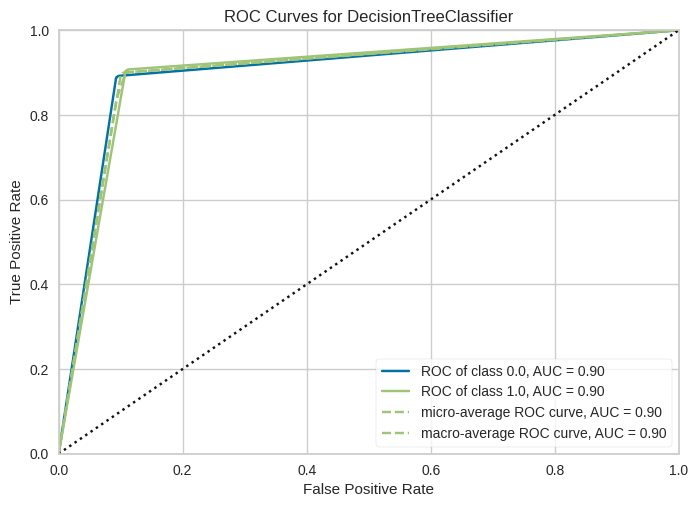

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model4 = DecisionTreeClassifier()
model4.fit(X_train_smote, y_train_smote)

DT_prediction_smote = model4.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, DT_prediction_smote))
print()

(unique, counts) = np.unique(DT_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, DT_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after SMOTE: ",roc_auc_score(y_test_smote, DT_prediction_smote))
print()

roc_auc=ROCAUC(model4)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

**RANDOM FOREST**

Accuracy =  0.9353893752879995

Count of predicted labels:  [0. 1.] [46198 44948]

Confusion Metrics after SMOTE: 
 [[42990  2681]
 [ 3208 42267]]

Precision Values for: 
  Healthy Patients with no disease = 0.9305597644919693
  Patients With Liver disease = 0.9403532971433657

Recall Values for: 
  Healthy Patients with no disease =  0.9412975411092378
  Healthy Patients With Liver disease =  0.9294557449147883

F-Measure Values for: 
  Healthy Patients with no disease =  0.9358978545537667
  Patients with liver disease =  0.934872764672705

ROC AUC score for Random Forest model after SMOTE:  0.9353766430120132



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


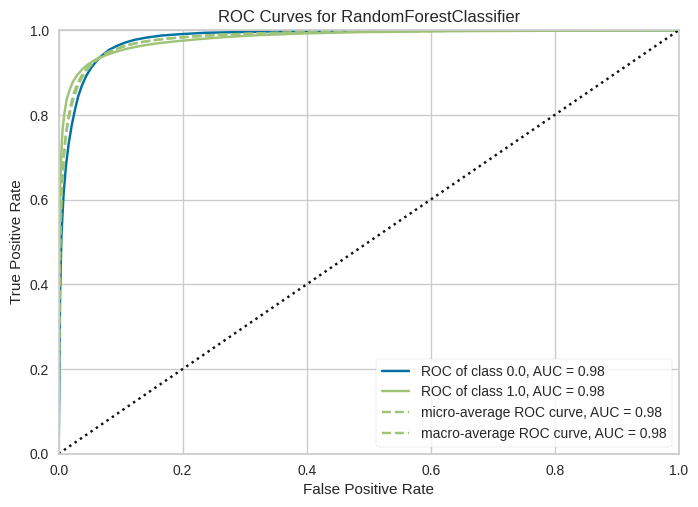

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model5= RandomForestClassifier(n_estimators = 25, random_state = 42)
model5.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model5.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTE: ",roc_auc_score(y_test_smote, RF_prediction_smote))
print()

roc_auc=ROCAUC(model5)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

**XGBOOST**

Accuracy =  0.9140828999626972

Count of predicted labels:  [0 1] [47746 43400]

Confusion Metrics after SMOTE: 
 [[42793  2878]
 [ 4953 40522]]

Precision Values for: 
  Healthy Patients with no disease = 0.896263561345453
  Patients With Liver disease = 0.9336866359447005

Recall Values for: 
  Healthy Patients with no disease =  0.9369840818024567
  Healthy Patients With Liver disease =  0.8910830126443101

F-Measure Values for: 
  Healthy Patients with no disease =  0.9161715747669054
  Patients with liver disease =  0.9118874824191281

ROC AUC score for XGBoost classifier after SMOTE:  0.9140335472233834



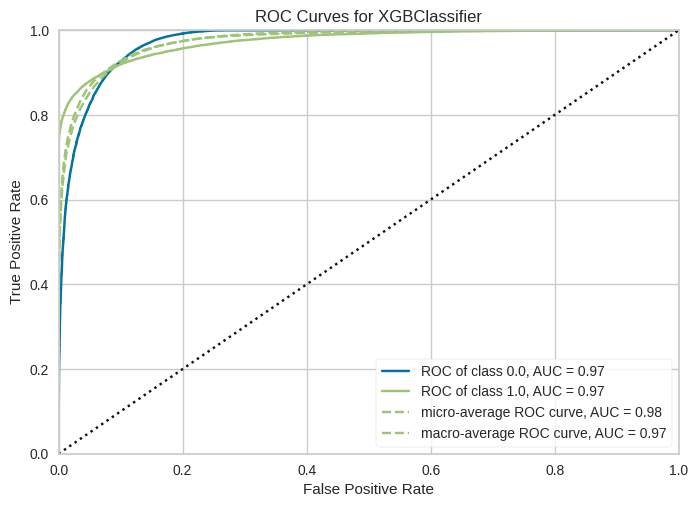

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model6 = xgb.XGBClassifier()
model6.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model6.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBoost classifier after SMOTE: ",roc_auc_score(y_test_smote, RF_prediction_smote))
print()

roc_auc=ROCAUC(model6)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

**GRADIENT BOOSTING**

In [ ]:
model7 = GradientBoostingClassifier()
model7.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model7.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gradient boosting classifier after SMOTE: ",roc_auc_score(y_test_smote, RF_prediction_smote))
print()

roc_auc=ROCAUC(model7)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()


**LIGHT GBM**

[LightGBM] [Info] Number of positive: 182388, number of negative: 182192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 364580, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500269 -> initscore=0.001075
[LightGBM] [Info] Start training from score 0.001075
Accuracy =  0.9039672613170079

Count of predicted labels:  [0. 1.] [47532 43614]

Confusion Metrics after SMOTE: 
 [[42225  3446]
 [ 5307 40168]]

Precision Values for: 
  Healthy Patients with no disease = 0.8883489017924766
  Patients With Liver disease = 0.9209886733617646

Recall Values for: 
  Healthy Patients with no disease =  0.9245473057301132
  Healthy Patients With Liver disease =  0.8832985156679494

F-Measure Values for:

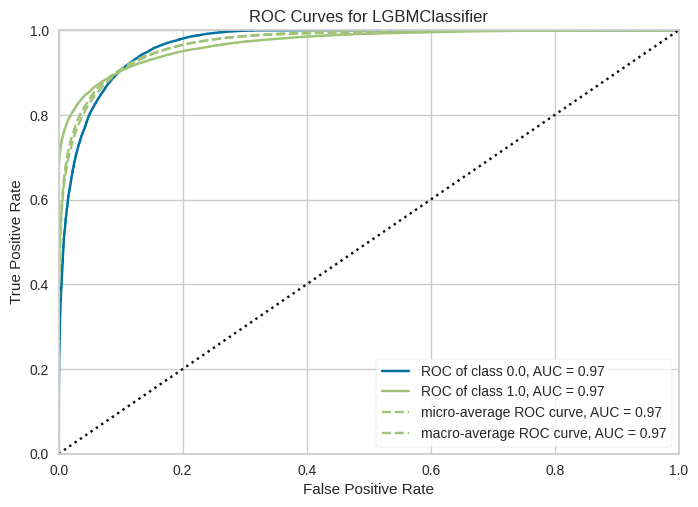

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model8 = LGBMClassifier()
model8.fit(X_train_smote, y_train_smote)

LGBM_prediction_smote = model8.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, LGBM_prediction_smote))
print()

(unique, counts) = np.unique(LGBM_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, LGBM_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for LightGBoost model after SMOTE: ",roc_auc_score(y_test_smote, LGBM_prediction_smote))
print()

roc_auc=ROCAUC(model8)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

<ipython-input-119-fe9f5b536cb1>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-119-fe9f5b536cb1>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-119-fe9f5b536cb1>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-119-fe9f5b536cb1>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-1

[LightGBM] [Info] Number of positive: 182388, number of negative: 182192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 364580, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500269 -> initscore=0.001075
[LightGBM] [Info] Start training from score 0.001075


<ipython-input-119-fe9f5b536cb1>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-119-fe9f5b536cb1>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


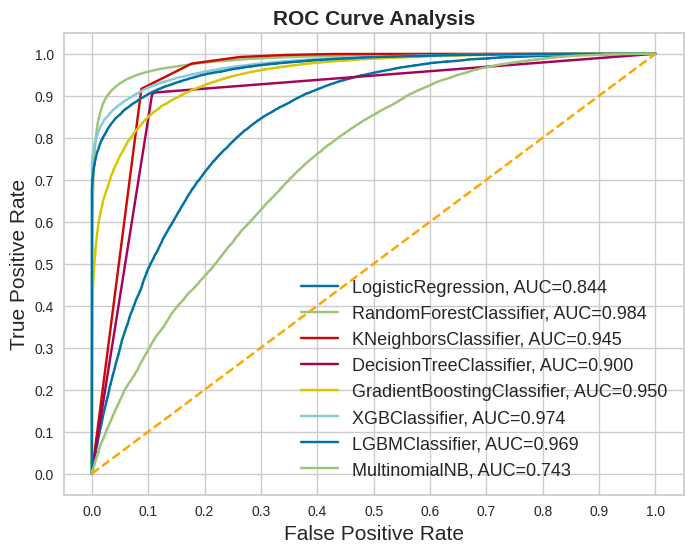

In [ ]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         GradientBoostingClassifier(),
         xgb.XGBClassifier(),
         LGBMClassifier(),
         MultinomialNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_smote, y_train_smote)
    yproba = model.predict_proba(X_test_smote)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_smote, yproba)
    auc = roc_auc_score(y_test_smote, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**BALANCING TECHNIQUE 2 - ADASYN**

In [ ]:
from imblearn.over_sampling import ADASYN

X_adasyn, Y_adasyn = ADASYN().fit_resample(X, Y)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, Y_adasyn, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique3, counts3) = np.unique(Y_adasyn, return_counts=True)
print("After ADASYN: ", unique3, counts3)

Original data:  [0. 1.] [227863  23642]
After ADASYN:  [0. 1.] [227863 227133]


**1. LOGISTIC REGRESSION**

Accuracy: 0.7571208791208791

Count of predicted label: [0. 1.] [42194 48806]

Confusion Metrics: 
 [[32866 12774]
 [ 9328 36032]]

Precision Values for: 
  Healthy Patients with no disease = 0.77892591363701
  Patients With Liver disease = 0.7382698848502234

Recall Values for: 
  Healthy Patients with no disease =  0.72011393514461
  Healthy Patients With Liver disease =  0.7943562610229277

F-Measure Values for: 
  Healthy Patients with no disease =  0.7483662363094019
  Patients with liver disease =  0.7652868338890896

ROC AUC score for Logistic Regression model after ADASYN:  0.7572350980837689



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


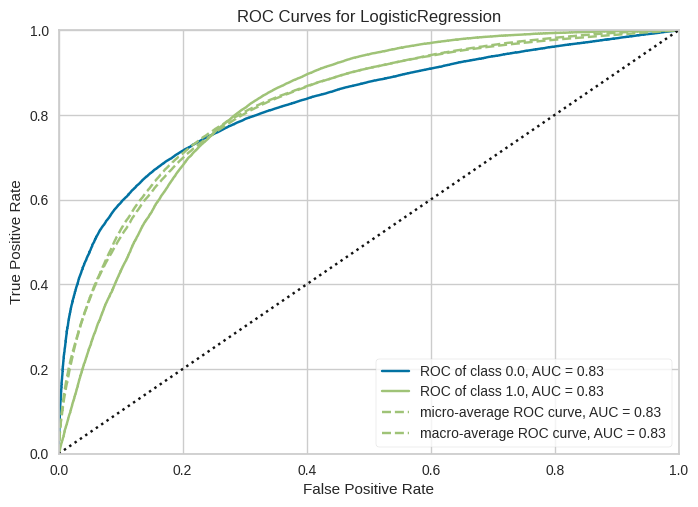

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model1 = LogisticRegression(max_iter=900)
model1.fit(X_train_adasyn, y_train_adasyn)
LR_prediction_adasyn = model1.predict(X_test_adasyn)

accuracy = metrics.accuracy_score(y_test_adasyn, LR_prediction_adasyn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, LR_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after ADASYN: ", roc_auc_score(y_test_adasyn, LR_prediction_adasyn))
print()

roc_auc=ROCAUC(model1)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

2. NAIVE BAYES

Accuracy =  0.6250549450549451

Count of predicted labels:  [0. 1.] [60622 30378]

Confusion Metrics after ADASYN: 
 [[36071  9569]
 [24551 20809]]

Precision Values for: 
  Healthy Patients with no disease = 0.5950150110520933
  Patients With Liver disease = 0.6850023042991639

Recall Values for: 
  Healthy Patients with no disease =  0.7903374233128835
  Healthy Patients With Liver disease =  0.4587522045855379

F-Measure Values for: 
  Healthy Patients with no disease =  0.6789068528730873
  Patients with liver disease =  0.5494995906942353

ROC AUC score for Gaussian Naive Bayes model after ADASYN:  0.6245448139492107



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


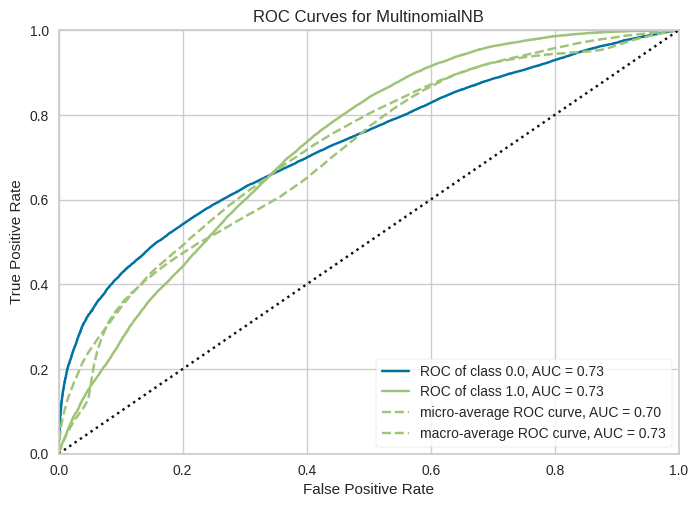

<Axes: title={'center': 'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model2 = MultinomialNB()
model2.fit(X_train_adasyn, y_train_adasyn)

NB_prediction_adasyn = model2.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, NB_prediction_adasyn))
print()

(unique, counts) = np.unique(NB_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, NB_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after ADASYN: ",roc_auc_score(y_test_adasyn, NB_prediction_adasyn))
print()

roc_auc=ROCAUC(model2)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

3. KNN

Accuracy =  0.8578681318681318

Count of predicted labels:  [0. 1.] [33412 57588]

Confusion Metrics after ADASYN: 
 [[33059 12581]
 [  353 45007]]

Precision Values for: 
  Healthy Patients with no disease = 0.9894349335568059
  Patients With Liver disease = 0.781534347433493

Recall Values for: 
  Healthy Patients with no disease =  0.7243426818580193
  Healthy Patients With Liver disease =  0.9922178130511464

F-Measure Values for: 
  Healthy Patients with no disease =  0.8363861761878257
  Patients with liver disease =  0.8743637564595719

ROC AUC score for KNN model after ADASYN:  0.8582802474545828



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


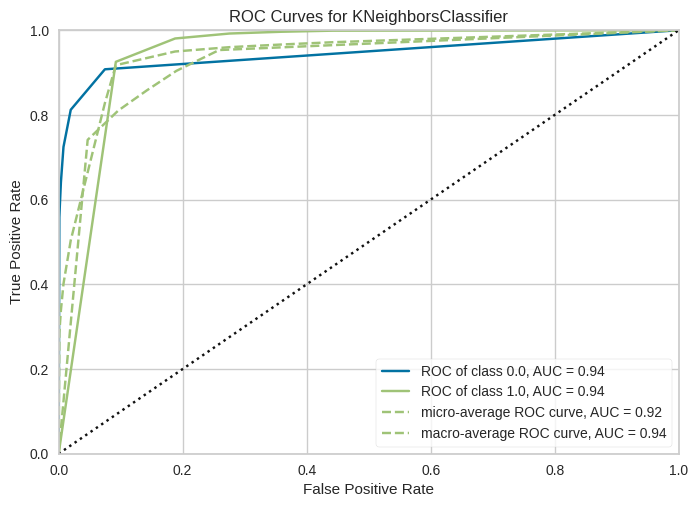

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model3 = KNeighborsClassifier()
model3.fit(X_train_adasyn, y_train_adasyn)

KNN_prediction_adasyn = model3.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, KNN_prediction_adasyn))
print()

(unique, counts) = np.unique(KNN_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, KNN_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for KNN model after ADASYN: ",roc_auc_score(y_test_adasyn, KNN_prediction_adasyn))
print()

roc_auc=ROCAUC(model3)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

4. DECISION TREE

Accuracy =  0.8964615384615384

Count of predicted labels:  [0. 1.] [45116 45884]

Confusion Metrics after ADASYN: 
 [[40667  4973]
 [ 4449 40911]]

Precision Values for: 
  Healthy Patients with no disease = 0.9013875343558826
  Patients With Liver disease = 0.891617993200244

Recall Values for: 
  Healthy Patients with no disease =  0.8910385626643296
  Healthy Patients With Liver disease =  0.9019179894179894

F-Measure Values for: 
  Healthy Patients with no disease =  0.8961831724624267
  Patients with liver disease =  0.8967384156766472

ROC AUC score for Decision Tree model after ADASYN:  0.8964782760411595



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


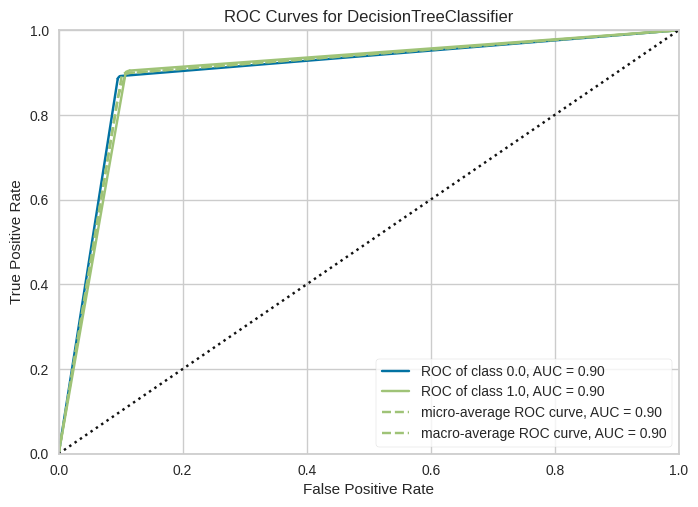

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model4 = DecisionTreeClassifier()
model4.fit(X_train_adasyn, y_train_adasyn)

DT_prediction_adasyn = model4.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, DT_prediction_adasyn))
print()

(unique, counts) = np.unique(DT_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, DT_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after ADASYN: ",roc_auc_score(y_test_adasyn, DT_prediction_adasyn))
print()

roc_auc=ROCAUC(model4)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

5. RANDOM FOREST

Accuracy =  0.9342417582417583

Count of predicted label: [0. 1.] [45938 45062]

Confusion Metrics: 
 [[42797  2843]
 [ 3141 42219]]

Precision Values for: 
  Healthy Patients with no disease = 0.9316252340110583
  Patients With Liver disease = 0.9369091473969198

Recall Values for: 
  Healthy Patients with no disease =  0.9377081507449606
  Healthy Patients With Liver disease =  0.9307539682539683

F-Measure Values for: 
  Healthy Patients with no disease =  0.9346567953001813
  Patients with liver disease =  0.9338214151423326

ROC AUC score for Random Forest model after ADASYN:  0.9342310594994645



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


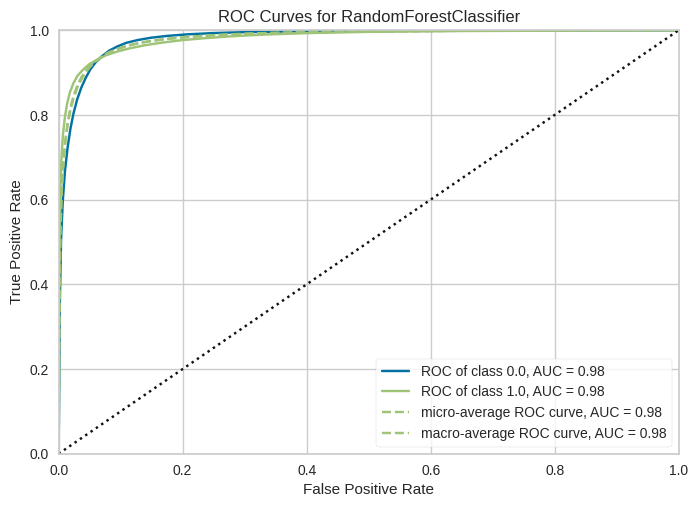

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model5 = RandomForestClassifier(n_estimators = 25, random_state = 40)
model5.fit(X_train_adasyn, y_train_adasyn)

RF_prediction_adasyn = model5.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, RF_prediction_adasyn))
print()
(unique, counts) = np.unique(RF_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, RF_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after ADASYN: ", roc_auc_score(y_test_adasyn, RF_prediction_adasyn))
print()

roc_auc=ROCAUC(model5)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

**6. XG BOOST**

Accuracy =  0.9126593406593406

Count of predicted labels:  [0 1] [47858 43142]

Confusion Metrics after ADASYN: 
 [[42775  2865]
 [ 5083 40277]]

Precision Values for: 
  Healthy Patients with no disease = 0.8937899619708304
  Patients With Liver disease = 0.9335913958555468

Recall Values for: 
  Healthy Patients with no disease =  0.9372261174408414
  Healthy Patients With Liver disease =  0.8879409171075838

F-Measure Values for: 
  Healthy Patients with no disease =  0.9149928340713169
  Patients with liver disease =  0.9101941199068948

ROC AUC score for XGBOOST model after ADASYN:  0.9125835172742126



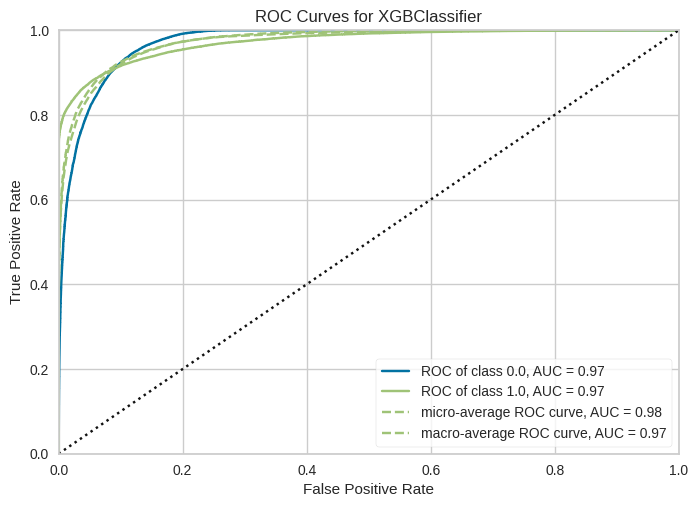

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model6 = xgb.XGBClassifier()
model6.fit(X_train_adasyn, y_train_adasyn)

XGB_prediction_adasyn = model6.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, XGB_prediction_adasyn))
print()

(unique, counts) = np.unique(XGB_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, XGB_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBOOST model after ADASYN: ",roc_auc_score(y_test_adasyn, XGB_prediction_adasyn))
print()

roc_auc=ROCAUC(model6)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

**7. GRADIENT BOOSTING**

Accuracy =  0.8698791208791209

Count of predicted labels:  [0. 1.] [45587 45413]

Confusion Metrics after ADASYN: 
 [[39693  5947]
 [ 5894 39466]]

Precision Values for: 
  Healthy Patients with no disease = 0.8707087546888367
  Patients With Liver disease = 0.8690463083258098

Recall Values for: 
  Healthy Patients with no disease =  0.8696976336546889
  Healthy Patients With Liver disease =  0.8700617283950617

F-Measure Values for: 
  Healthy Patients with no disease =  0.8702029004571016
  Patients with liver disease =  0.8695537219217168

ROC AUC score for GradientBoostingClassifier model after ADASYN:  0.8698796810248753



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


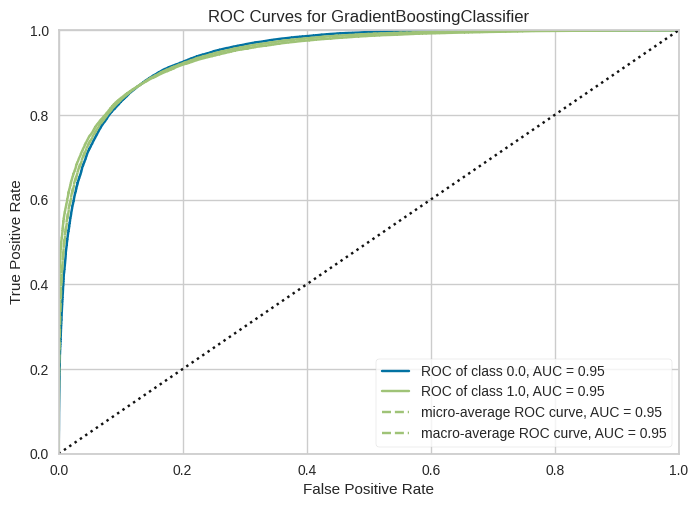

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model7 = GradientBoostingClassifier()
model7.fit(X_train_adasyn, y_train_adasyn)

LGBM_prediction_adasyn = model7.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, LGBM_prediction_adasyn))
print()

(unique, counts) = np.unique(LGBM_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, LGBM_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for GradientBoostingClassifier model after ADASYN: ",roc_auc_score(y_test_adasyn, LGBM_prediction_adasyn))
print()

roc_auc=ROCAUC(model7)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

8. LIGHT GBM

[LightGBM] [Info] Number of positive: 181773, number of negative: 182223
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 363996, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499382 -> initscore=-0.002473
[LightGBM] [Info] Start training from score -0.002473
Accuracy =  0.9001208791208791

Count of predicted labels:  [0. 1.] [47681 43319]

Confusion Metrics after ADASYN: 
 [[42116  3524]
 [ 5565 39795]]

Precision Values for: 
  Healthy Patients with no disease = 0.8832868438161952
  Patients With Liver disease = 0.9186500150049631

Recall Values for: 
  Healthy Patients with no disease =  0.9227870289219983
  Healthy Patients With Liver disease =  0.8773148148148148

F-Measure Values f

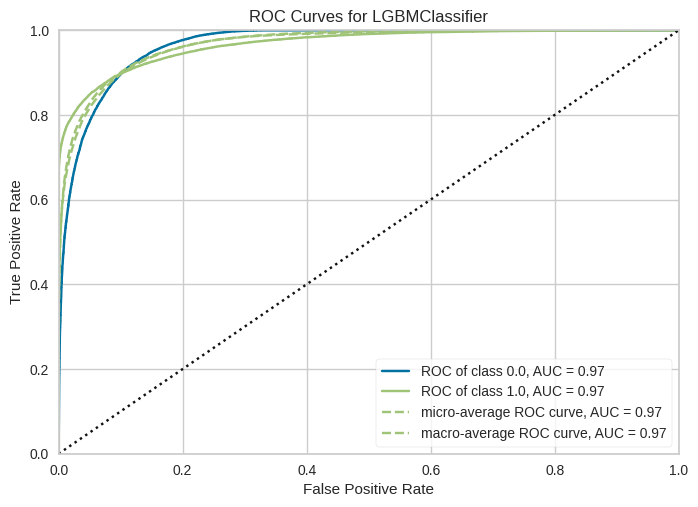

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
model8 = LGBMClassifier()
model8.fit(X_train_adasyn, y_train_adasyn)

LGBM_prediction_adasyn = model8.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, LGBM_prediction_adasyn))
print()

(unique, counts) = np.unique(LGBM_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, LGBM_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for LGBMOOST model after ADASYN: ",roc_auc_score(y_test_adasyn, LGBM_prediction_adasyn))
print()

roc_auc=ROCAUC(model8)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

<ipython-input-120-06f2a32ac892>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-120-06f2a32ac892>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-120-06f2a32ac892>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-120-06f2a32ac892>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-1

[LightGBM] [Info] Number of positive: 181773, number of negative: 182223
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 363996, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499382 -> initscore=-0.002473
[LightGBM] [Info] Start training from score -0.002473


<ipython-input-120-06f2a32ac892>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-120-06f2a32ac892>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


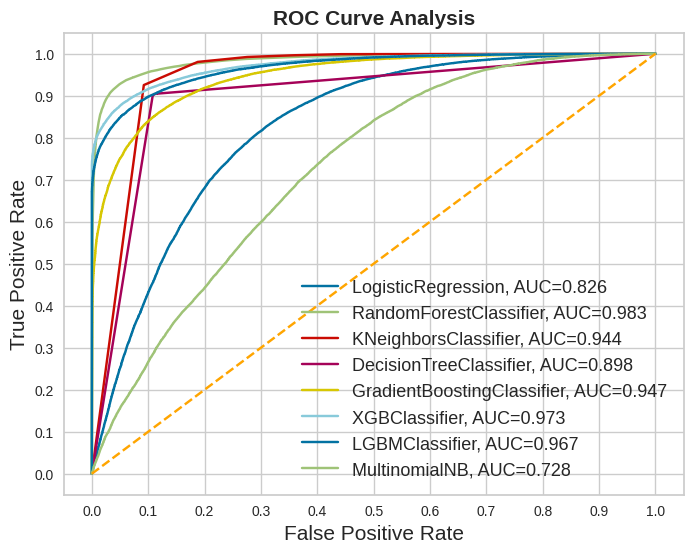

In [ ]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         GradientBoostingClassifier(),
         xgb.XGBClassifier(),
         LGBMClassifier(),
         MultinomialNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_adasyn, y_train_adasyn)
    yproba = model.predict_proba(X_test_adasyn)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_adasyn, yproba)
    auc = roc_auc_score(y_test_adasyn, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()